**Importing** **Libraries**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading** **Dataset**

In [ ]:
pd.set_option('display.max_columns',None)
burnoutDf=pd.read_csv('/content/drive/MyDrive/Employessburnout.csv')
burnoutDf

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,30-09-2008,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,30-11-2008,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,10-03-2008,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,03-11-2008,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,24-07-2008,Female,Service,No,3,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,30-12-2008,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,19-01-2008,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,05-11-2008,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,10-01-2008,Female,Service,No,2,5.0,5.9,0.52


In [ ]:
# convert into dateTime dataType
burnoutDf["Date of Joining"]=pd.to_datetime(burnoutDf["Date of Joining"])

In [ ]:
# give the number of rows and columns
burnoutDf.shape

(22750, 9)

In [ ]:
# general information
burnoutDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [ ]:
# show top 5 rows
burnoutDf.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-10-03,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-03-11,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [ ]:
# extract all columns of the dataset
burnoutDf.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [ ]:
# check for null  values
burnoutDf.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [ ]:
# check the duplicate values
burnoutDf.duplicated().sum()

0

In [ ]:
# calculate the mean ,std,min,max and count of every attribute
burnoutDf.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [ ]:
# show the unique values
for i, col in enumerate(burnoutDf.columns):
  print(f"\n\n{burnoutDf[col].unique()}")
  print(f"\n{burnoutDf[col].value_counts()}\n\n")



['fffe32003000360033003200' 'fffe3700360033003500'
 'fffe31003300320037003900' ... 'fffe390032003000'
 'fffe33003300320036003900' 'fffe3400350031003800']

fffe32003000360033003200    1
fffe3600360035003500        1
fffe3800360034003400        1
fffe31003000310033003600    1
fffe31003400350031003700    1
                           ..
fffe33003400340032003400    1
fffe32003100370036003600    1
fffe31003900310035003800    1
fffe32003400320034003200    1
fffe3400350031003800        1
Name: Employee ID, Length: 22750, dtype: int64




['2008-09-30T00:00:00.000000000' '2008-11-30T00:00:00.000000000'
 '2008-10-03T00:00:00.000000000' '2008-03-11T00:00:00.000000000'
 '2008-07-24T00:00:00.000000000' '2008-11-26T00:00:00.000000000'
 '2008-02-01T00:00:00.000000000' '2008-10-31T00:00:00.000000000'
 '2008-12-27T00:00:00.000000000' '2008-09-03T00:00:00.000000000'
 '2008-03-16T00:00:00.000000000' '2008-12-05T00:00:00.000000000'
 '2008-01-20T00:00:00.000000000' '2008-02-23T00:00:00.000000000'
 '2008-

In [ ]:
# Drop irrevelant column
burnoutDf=burnoutDf.drop(['Employee ID'],axis=1)

In [ ]:
# chexck the statements of the attributes
intFloatburnoutDf=burnoutDf.select_dtypes([np.int,np.float])
for i,col in enumerate(intFloatburnoutDf.columns):
  if(intFloatburnoutDf[col].skew() >=0.1):
    print("\n",col,"feature is Positively Skewed and value is:",intFloatburnoutDf[col].skew())
  elif(intFloatburnoutDf[col].skew() <=0.1):
    print("\n",col,"feature is Negtively Skewed and value is:",intFloatburnoutDf[col].skew())
  else:
    print("\n","feature is Normally Distributed and value is:",intFloatburnoutDf[col].skew())


 Designation feature is Negtively Skewed and value is: 0.09242138478903683

 Resource Allocation feature is Positively Skewed and value is: 0.20457273454318103

 Mental Fatigue Score feature is Negtively Skewed and value is: -0.4308950578815428

 Burn Rate feature is Negtively Skewed and value is: 0.045737370909640515


In [ ]:
# replace the null valus with mean
burnoutDf['Resource Allocation'].fillna(burnoutDf['Resource Allocation'].mean(),inplace=True)
burnoutDf['Mental Fatigue Score'].fillna(burnoutDf['Mental Fatigue Score'].mean(),inplace=True)
burnoutDf['Burn Rate'].fillna(burnoutDf['Burn Rate'].mean(),inplace=True)

In [ ]:
# check for null values
burnoutDf.isna().sum()

Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [ ]:
# show the correlation
burnoutDf.corr()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Designation,1.000000,0.852046,0.656445,0.719284
Resource Allocation,0.852046,1.000000,0.739268,0.811062
Mental Fatigue Score,0.656445,0.739268,1.000000,0.878217
Burn Rate,0.719284,0.811062,0.878217,1.000000


**Data Visualization**

In [ ]:
# plotting heat map to check correclation
import seaborn as sns
import plotly.express as px

corr = burnoutDf.corr()
sns.set(rc={'figure.figsize': (14, 12)})
fig = px.imshow(corr, text_auto=True, aspect='auto')
fig.show()


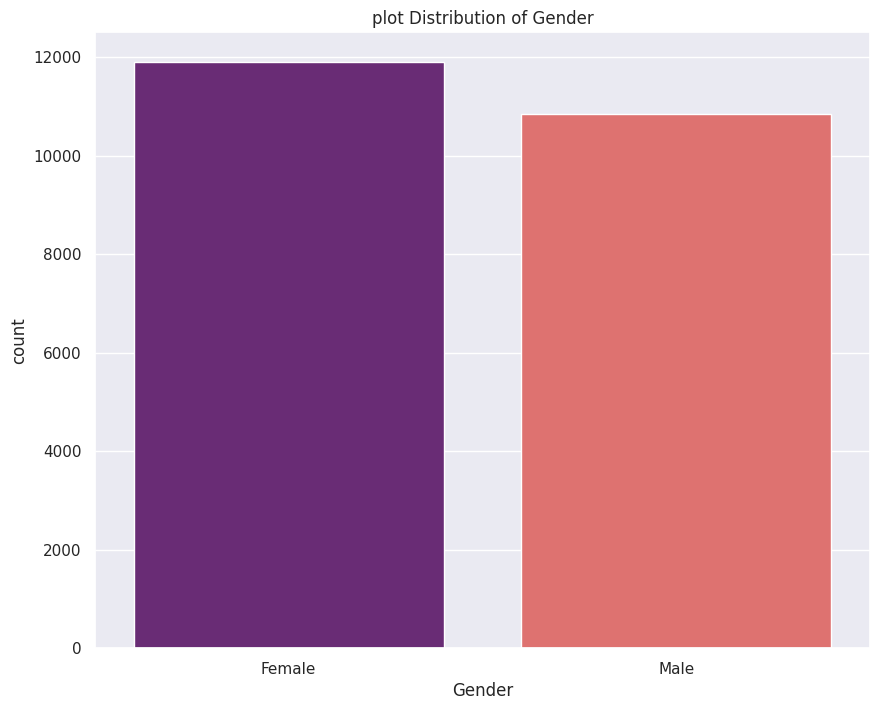

In [ ]:
# count plot disribution of "Gender"
plt.figure(figsize=(10,8))
sns.countplot(x="Gender",data=burnoutDf,palette="magma")
plt.title("plot Distribution of Gender")
plt.show()

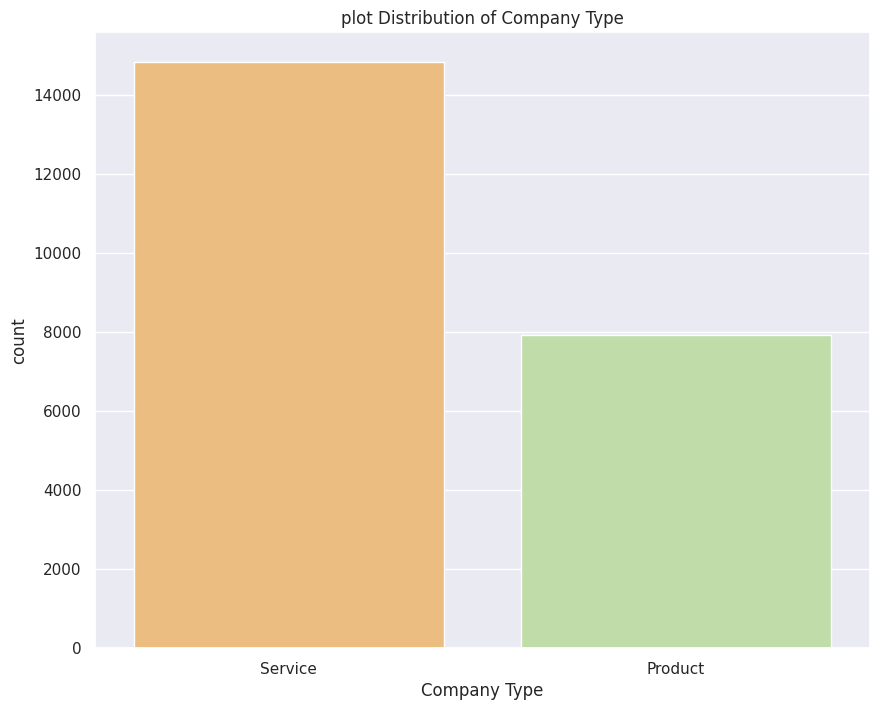

In [ ]:
# count plot distribution of "Company Type"
plt.figure(figsize=(10,8))
sns.countplot(x="Company Type",data=burnoutDf,palette="Spectral")
plt.title("plot Distribution of Company Type")
plt.show()

**Label Encoding**

In [ ]:
# label encoding and assign in new variable
from sklearn import preprocessing
Label_encode=preprocessing.LabelEncoder()

In [ ]:
# Assign in new variable
burnoutDf['GenderLabel']=Label_encode.fit_transform(burnoutDf['Gender'].values)
burnoutDf['Company_TypeLabel']=Label_encode.fit_transform(burnoutDf['Company Type'].values)
burnoutDf['WFH__Setup__AvailableLabel']=Label_encode.fit_transform(burnoutDf['WFH Setup Available'].values)

In [ ]:
# check the assigned values
gn = burnoutDf.groupby('Gender')
gn = gn['GenderLabel']
gn.first()

Gender
Female    0
Male      1
Name: GenderLabel, dtype: int64

In [ ]:
# check assigned values
ct = burnoutDf.groupby('Company Type')
ct = ct['Company_TypeLabel']
ct.first()

Company Type
Product    0
Service    1
Name: Company_TypeLabel, dtype: int64

In [ ]:
# check assigned values
wsa = burnoutDf.groupby('WFH Setup Available')
wsa = wsa['WFH__Setup__AvailableLabel']
wsa.first()

WFH Setup Available
No     0
Yes    1
Name: WFH__Setup__AvailableLabel, dtype: int64

In [ ]:
# show last 10 rows
burnoutDf.tail(10)

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,GenderLabel,Company_TypeLabel,WFH__Setup__AvailableLabel
22740,2008-05-09,Female,Product,No,3,6.0,7.300000,0.550000,0,0,0
22741,2008-07-01,Male,Product,No,2,5.0,6.000000,0.452005,1,0,0
22742,2008-07-28,Male,Product,No,3,5.0,8.100000,0.690000,1,0,0
22743,2008-12-15,Female,Product,Yes,1,3.0,6.000000,0.480000,0,0,1
22744,2008-05-27,Male,Product,No,3,7.0,6.200000,0.540000,1,0,0
22745,2008-12-30,Female,Service,No,1,3.0,5.728188,0.410000,0,1,0
22746,2008-01-19,Female,Product,Yes,3,6.0,6.700000,0.590000,0,0,1
22747,2008-05-11,Male,Service,Yes,3,7.0,5.728188,0.720000,1,1,1
22748,2008-10-01,Female,Service,No,2,5.0,5.900000,0.520000,0,1,0
22749,2008-06-01,Male,Product,No,3,6.0,7.800000,0.610000,1,0,0


**Feature Selection**

In [ ]:
# Feature selection
Columns = ['Designation', 'Resource Allocation', 'Mental Fatigue Score',
           'GenderLabel', 'Company_TypeLabel', 'WFH__Setup__AvailableLabel']
X = burnoutDf[Columns]
Y = burnoutDf['Burn Rate']


In [ ]:
print(X)

       Designation  Resource Allocation  Mental Fatigue Score  GenderLabel  \
0                2             3.000000              3.800000            0   
1                1             2.000000              5.000000            1   
2                2             4.481398              5.800000            0   
3                1             1.000000              2.600000            1   
4                3             7.000000              6.900000            0   
...            ...                  ...                   ...          ...   
22745            1             3.000000              5.728188            0   
22746            3             6.000000              6.700000            0   
22747            3             7.000000              5.728188            1   
22748            2             5.000000              5.900000            0   
22749            3             6.000000              7.800000            1   

       Company_TypeLabel  WFH__Setup__AvailableLabel  
0       

In [ ]:
print(Y)

0        0.16
1        0.36
2        0.49
3        0.20
4        0.52
         ... 
22745    0.41
22746    0.59
22747    0.72
22748    0.52
22749    0.61
Name: Burn Rate, Length: 22750, dtype: float64


**Implementing PCA**

In [ ]:
# Principle component Analysis
from sklearn.decomposition import  PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X)

print("PCA shape of X is: ", X_pca.shape, "and original shape is:", X.shape)
print("% of importance of selected features is:",pca.explained_variance_ratio_)
print("The number of features selected through PCA is:",pca.n_components_)


PCA shape of X is:  (22750, 4) and original shape is: (22750, 6)
% of importance of selected features is: [0.78371089 0.11113597 0.03044541 0.02632422]
The number of features selected through PCA is: 4


**Data Splitting**

In [ ]:
# Data splitting in train and test
from sklearn.model_selection import train_test_split
X_train_pca,X_test,Y_train,Y_test =train_test_split(X_pca,Y,test_size=0.25,random_state=10)

In [ ]:
# print the shape of splitting data
print(X_train_pca.shape,X_test.shape,Y_train.shape,Y_test.shape)

(17062, 4) (5688, 4) (17062,) (5688,)


**Model Implementation**

**Random Forest Regression**

In [ ]:
# Random Forest regressior
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf_model = RandomForestRegressor()
rf_model.fit(X_train_pca, Y_train)

train_pred_rf = rf_model.predict(X_train_pca)
train_r2 = r2_score(Y_train, train_pred_rf)
test_pred_rf = rf_model.predict(X_test)
test_r2 = r2_score(Y_test, test_pred_rf)

# Accuracy score
print("Accuracy score of train data: " + str(round(100*train_r2, 4)) + "%")
print("Accuracy score of test data: " + str(round(100*test_r2, 4)) + "%")
rf_model = RandomForestRegressor()
rf_model.fit(X_train_pca, Y_train)



Accuracy score of train data: 91.1989%
Accuracy score of test data: 83.8909%


RandomForestRegressor()

**AdaBoost regressor**

In [ ]:
# AdaBoost regressor
from sklearn.ensemble import AdaBoostRegressor
abr_model = AdaBoostRegressor()
abr_model.fit(X_train_pca, Y_train)

train_pred_adboost =abr_model.predict(X_train_pca)
train_r2 = r2_score(Y_train,train_pred_adboost)
test_pred_adaboost = abr_model.predict(X_test)
test_r2 = r2_score(Y_test, test_pred_adaboost)

# Accuracy score
print("Accuracy score of train data:"+str(round(100*train_r2,4))+"%")
print("Accuracy score of train data:"+str(round(100*test_r2,4))+"%")


Accuracy score of train data:77.0094%
Accuracy score of train data:76.4879%
